In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from itertools import combinations
from collections import Counter
%matplotlib inline

In [3]:
data = pd.read_csv('movie_bd_v5.csv')
data.sample(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
411,tt1386588,100000000,170432927,The Other Guys,Will Ferrell|Mark Wahlberg|Eva Mendes|Samuel L...,Adam McKay,When the cops are busy... Our only hope is...,NYPD detectives Christopher Danson (Johnson) a...,107,Action|Comedy|Crime,Columbia Pictures|Gary Sanchez Productions,8/6/2010,6.1,2010
105,tt3862750,12000000,60273173,The Perfect Guy,Michael Ealy|Sanaa Lathan|Morris Chestnut|Kath...,David M. Rosenthal,"Trust one, fear the other.",Leah Vaughn appears to have the ideal life. Sh...,100,Drama|Thriller,Screen Gems,9/11/2015,5.6,2015
1529,tt0383060,35000000,12506188,Zoom,Tim Allen|Courteney Cox|Chevy Chase|Spencer Br...,Peter Hewitt,They're going to save the world... as long as ...,Jack Shepard is an out-of-shape auto shop owne...,83,Fantasy|Comedy|Family,Columbia Pictures|Revolution Studios,8/11/2006,5.1,2006
355,tt0891592,50000000,12764201,Street Fighter: The Legend of Chun-Li,Kristin Kreuk|Chris Klein|Neal McDonough|Micha...,Andrzej Bartkowiak,Some fight for power. Some fight for us.,"When a teenager, Chun-Li witnesses the kidnapp...",97,Action|Adventure|Science Fiction|Thriller,Twentieth Century Fox Film Corporation|Hyde Pa...,2/27/2009,4.1,2009
112,tt1018765,28000000,7002261,Our Brand Is Crisis,Sandra Bullock|Anthony Mackie|Billy Bob Thornt...,David Gordon Green,May the best campaign win.,"A feature film based on the documentary ""Our B...",108,Drama|Comedy,Participant Media|Smokehouse Pictures,9/11/2015,5.7,2015


In [ ]:
data.info()

In [ ]:
data.describe()

# Предобработка

In [4]:
answers = {} # создадим словарь для ответов

# добавляем колонку profit (profit=revenue-budget)
data['profit'] = data.revenue - data.budget

# переводим дату в формат DateTime
data.release_date = pd.to_datetime(data['release_date'])

# создадим копию датасета
data2 = data.copy()

# создадим функцию для разделения значений в ячейках
def splitting(series_obj):
    return series_obj.split("|")

# заменяем значения в ячейках на списки (где необходимо)
data2.genres = data2.genres.apply(splitting)
data2.director = data2.director.apply(splitting)
data2.cast = data2.cast.apply(splitting)
data2.production_companies = data2.production_companies.apply(splitting)

# 1. У какого фильма из списка самый большой бюджет?

In [ ]:
answers['1'] = 'Pirates of the Caribbean: On Stranger Tides (tt1298650)'

In [ ]:
data[data.budget == data.budget.max()]

ВАРИАНТ 2

In [64]:
data.loc[data.budget.idxmax()]['original_title']

'Pirates of the Caribbean: On Stranger Tides'

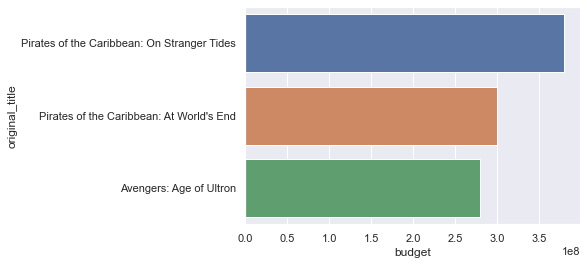

In [62]:
temp = data.sort_values(by = 'budget', ascending = False).head(3)
sns.barplot(y = 'original_title', x = 'budget', data = temp)

# 2. Какой из фильмов самый длительный (в минутах)?

In [ ]:
answers['2'] = 'Gods and Generals (tt0279111)'

In [ ]:
data[data.runtime == data.runtime.max()]

# 3. Какой из фильмов самый короткий (в минутах)?





In [ ]:
answers['3'] = 'Winnie the Pooh'

In [ ]:
data.loc[data.runtime.idxmin()][['original_title']]

# 4. Какова средняя длительность фильмов?


In [ ]:
answers['4'] = '109.66'

In [ ]:
data.runtime.mean()

# 5. Каково медианное значение длительности фильмов? 

In [ ]:
answers['5'] = '107'

In [ ]:
data.runtime.median()

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [ ]:
answers['6'] = 'Avatar'

In [ ]:
data.loc[data.profit.idxmax()][['original_title']]

# 7. Какой фильм самый убыточный? 

In [ ]:
answers['7'] = 'The Lone Ranger'

In [ ]:
data[data.profit == data.profit.min()][['original_title']]

# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [ ]:
answers['8'] = '1478'

In [ ]:
len(data.profit[data.profit > 0])

In [ ]:
len(data.query('profit > 0'))

# 9. Какой фильм оказался самым кассовым в 2008 году?

In [ ]:
answers['9'] = 'The Dark Knight'

In [ ]:
data_temp = data[data.release_year == 2008]

In [ ]:
data_temp.query('revenue == revenue.max()')['original_title']

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


In [ ]:
answers['10'] = 'The Lone Ranger'

In [ ]:
data_temp = data[(data.release_year >= 2012) & (data.release_year < 2015)]
data_temp.loc[data_temp.profit.idxmin()]['original_title']

# 11. Какого жанра фильмов больше всего?

In [ ]:
answers['11'] = 'Drama'

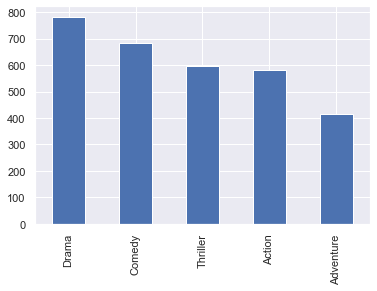

In [71]:
data.genres.str.split('|').explode().value_counts().head(5).plot(kind = 'bar')

ВАРИАНТ 2

In [67]:
c = Counter()
for x in data.genres.apply(splitting):
    c += Counter(x)

print(c)

Counter({'Drama': 782, 'Comedy': 683, 'Thriller': 596, 'Action': 582, 'Adventure': 415, 'Crime': 315, 'Romance': 308, 'Family': 260, 'Science Fiction': 248, 'Fantasy': 222, 'Horror': 176, 'Mystery': 168, 'Animation': 139, 'Music': 64, 'History': 62, 'War': 58, 'Western': 19, 'Documentary': 8, 'Foreign': 2})


# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [ ]:
answers['12'] = 'Drama'

In [ ]:
data2.genres.explode()[data2.profit > 0].value_counts()

##### На самом деле "драматические" фильмы не становятся чаще всего прибыльными. Это случается в 72% случаев.
##### Чаще всего прибыльными становятся "документальные фильмы" - 87,5%. Но такие фильмы встречаются всего 8 раз.
##### Поэтому, можно утверждать, что чаще всего становятся прибыльными "семейные" фильмы.

In [ ]:
# посчитаем сколько раз, встречается каждый жанр
a = data2.explode('genres').genres.value_counts()

# посчитаем прибыльные фильмы
b = data2[data2.profit > 0].explode('genres').genres.value_counts()

# узнаем в каком соотношении жанры фильмов становятся прибыльными
x = b/a
x.sort_values(ascending = False)

# 13. У какого режиссера самые большие суммарные кассовые сбооры?

In [ ]:
answers['13'] = 'Peter Jackson'

In [ ]:
data_temp = data2.explode('director')
data_temp = data_temp.groupby('director').sum()
data_temp.revenue.idxmax()

# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [ ]:
answers['14'] = 'Robert Rodriguez'

In [ ]:
data_temp = data2.explode('director').explode('genres')
data_temp = data_temp.pivot_table(values = 'budget', index = 'director', columns = 'genres', aggfunc='count',)
data_temp.Action.idxmax()

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

In [ ]:
answers['15'] = 'Chris Hemsworth'

In [ ]:
data_temp = data2.explode('cast')
data_temp = data_temp.pivot_table(values = 'revenue', index = 'cast', columns = 'release_year', aggfunc = 'sum')
data_temp[2012].idxmax()

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

In [ ]:
answers['16'] = 'Matt Damon'

In [ ]:
data_temp = data2.explode('cast')

In [ ]:
data_temp[data_temp.budget > data_temp.budget.mean()].cast.value_counts()

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

In [ ]:
answers['17'] = 'Nicolas Cage'

In [ ]:
data_temp = data2.explode('cast').explode('genres')
data_temp = data_temp.pivot_table(values = 'budget', index = 'cast', columns = 'genres', aggfunc = 'count')
data_temp.loc['Nicolas Cage'].sort_values(ascending = False)

# 18. Самый убыточный фильм от Paramount Pictures

In [ ]:
answers['18'] = 'K-19'

In [ ]:
data_temp = data2.explode('production_companies')
data_temp = data_temp[data_temp.production_companies.str.contains('Paramount')]
data_temp.loc[data_temp.profit.idxmin()]['original_title']

# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [ ]:
answers['19'] = 2015

In [ ]:
data_temp = data.groupby('release_year')[['revenue']].sum()

data_temp.loc[data_temp.idxmax()]

# 20. Какой самый прибыльный год для студии Warner Bros?

In [ ]:
answers['20'] = '2014'

In [ ]:
data_temp = data[data.production_companies.str.contains('Warner')]
data_temp = data_temp.groupby('release_year').sum()
data_temp.profit.idxmax()

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [ ]:
answers['21'] = 'September'

In [ ]:
data.release_date.dt.month.value_counts()

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [ ]:
answers['22'] = 450

In [ ]:
data_temp = data.release_date.dt.month.value_counts()
answer = data_temp.loc[6] + data_temp.loc[7] + data_temp.loc[8]
print(answer)

In [ ]:
data_temp = data.query('5 < release_date.dt.month < 9')
len(data_temp)

# 23. Для какого режиссера зима – самое продуктивное время года? 

In [ ]:
answers['23'] = 'Peter Jackson'

In [ ]:
data_temp = data2.explode('director')
data_temp = data_temp.query('release_date.dt.month < 3 or release_date.dt.month == 12')
data_temp = data_temp.groupby('director').count()
data_temp.original_title.idxmax()

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

In [ ]:
answers['24'] = 'Four By Two Productions'

In [ ]:
data_temp = data2.explode('production_companies')
data_temp.original_title = data_temp.original_title.apply(lambda x: len(x))
data_temp = data_temp.groupby('production_companies').mean()
data_temp.original_title.idxmax()

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [ ]:
answers['25'] = 'Midnight Picture Show'

In [ ]:
data_temp = data2.explode('production_companies')
data_temp.overview = data_temp.overview.str.split(' ')
data_temp.overview = data_temp.overview.apply(lambda x: len(x))
data_temp = data_temp.groupby('production_companies').mean()
data_temp.overview.idxmax()

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

In [ ]:
answers['26'] = 'Inside Out, The Dark Knight, 12 Years a Slave'

In [ ]:
data.loc[data['vote_average']>data.quantile(0.99, numeric_only=True)['vote_average']]['original_title']

# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [ ]:
answers['27'] = 'Daniel Radcliffe, Rupert Grint'

In [ ]:
pairs_actors = {}

for actors in data.cast.str.split('|'):
    for actor in list(combinations(actors, 2)):
        if actor in pairs_actors:
            pairs_actors[actor] += 1
        else:
            pairs_actors[actor] = 1

max(pairs_actors, key=pairs_actors.get)

# Submission

In [ ]:
# в конце можно посмотреть свои ответы к каждому вопросу
answers

In [ ]:
# и убедиться что ни чего не пропустил)
len(answers)